<a href="https://colab.research.google.com/github/Ayman-queen/data-science-internship-tasks/blob/main/Task2_credit_Risk_predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

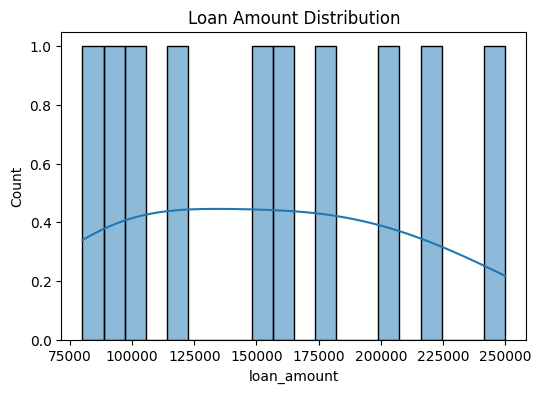

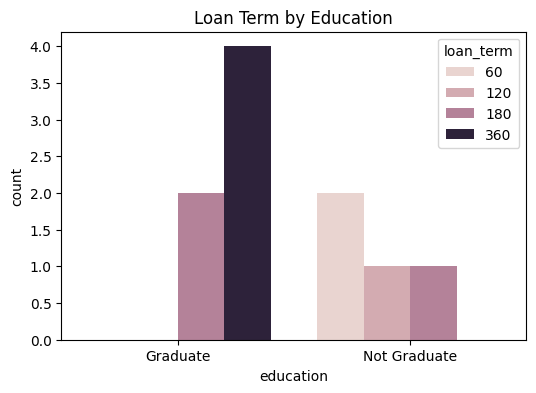

✅ Accuracy: 0.50


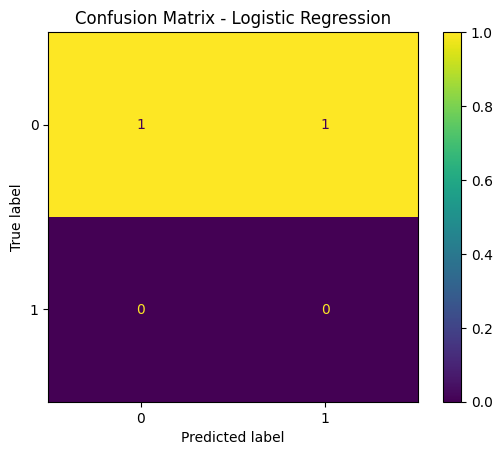

In [6]:
# ✅ Task 2: Credit Risk Prediction (with built-in sample data)

# Step 1: Import Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# Step 2: Create Sample DataFrame
data = {
    'education': ['Graduate', 'Not Graduate', 'Graduate', 'Graduate', 'Not Graduate', 'Graduate', 'Graduate', 'Not Graduate', 'Graduate', 'Not Graduate'],
    'self_employed': ['No', 'Yes', 'No', 'No', 'Yes', 'No', 'No', 'Yes', 'No', 'Yes'],
    'income_annum': [500000, 300000, 400000, 600000, 250000, 420000, 370000, 290000, 450000, 520000],
    'loan_amount': [200000, 100000, 150000, 250000, 80000, 180000, 120000, 90000, 220000, 160000],
    'loan_term': [360, 120, 180, 360, 60, 360, 180, 60, 360, 180],
    'cibil_score': [700, 650, 620, 710, 590, 700, 690, 600, 680, 710],
    'residential_assets_value': [50000]*10,
    'commercial_assets_value': [40000]*10,
    'luxury_assets_value': [30000]*10,
    'bank_asset_value': [70000]*10,
    'loan_status': [1, 0, 1, 1, 0, 1, 1, 0, 0, 1]
}

df = pd.DataFrame(data)

# Step 3: Visualizations
plt.figure(figsize=(6,4))
sns.histplot(df['loan_amount'], kde=True, bins=20)
plt.title("Loan Amount Distribution")
plt.show()

plt.figure(figsize=(6,4))
sns.countplot(data=df, x='education', hue='loan_term')
plt.title("Loan Term by Education")
plt.show()

# Step 4: Encode Categorical Features
le = LabelEncoder()
df['education'] = le.fit_transform(df['education'])       # Graduate=1
df['self_employed'] = le.fit_transform(df['self_employed'])  # No=0, Yes=1

# Step 5: Prepare Data
X = df.drop(columns=['loan_amount', 'loan_status'])  # Features
y = df['loan_status']                                # Target

# Step 6: Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Step 7: Model Training
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

# Step 8: Evaluate
acc = accuracy_score(y_test, y_pred)
print(f"✅ Accuracy: {acc:.2f}")

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix - Logistic Regression")
plt.show()